### 载入数据

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
print("Train image shape:",train_images.shape,"Train label shape:",train_labels.shape)
print("Test image shape:",test_images.shape,"Test label shape:",test_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [4]:
print("image data:",train_images[1])
print("image label:",train_labels[1])

image data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 25

In [5]:
type(train_images[1,1,1])

numpy.uint8

#### plt.imshow()第二个参数是这个图像得到模式参数，“binary”表示以灰度模式显示。

#### plt.show()函数中的图像数据参数支持以下数据形状:
- (M，N)：二维数值，代表图像大小为M行N列，值为每个像素点的取值
- (M,N,3):三维度数值，代表图像大小为M行N列(即图片的高和宽)，每个像素点的取值具有RGB三个通道的值（float或uint8）
- 参数cmap缺省值为none,将把图像数据映射为彩色图显示

In [6]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

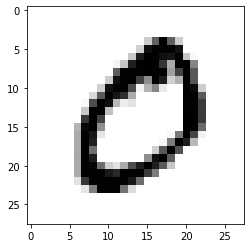

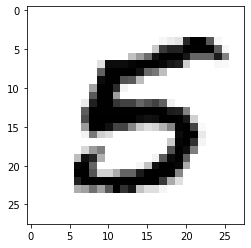

In [7]:
plot_image(train_images[1])
plot_image(train_images[20000])

#### 进一步理解reshape()

In [8]:
import numpy as np
int_array = np.array([i for i in range(64)])
print(int_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [9]:
int_array.reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [10]:
int_array.reshape(4,16)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

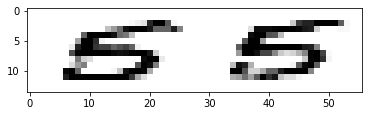

In [11]:
plt.imshow(train_images[20000].reshape(14,56),cmap='binary')

### 划分验证集

In [12]:
total_num = len(train_images)
valid_split = 0.2           # 验证集的比例占20%
train_num = int(total_num*(1-valid_split))  # 训练集的数目

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [13]:
valid_x.shape

(12000, 28, 28)

In [14]:
# 把(28,28)的结构拉直为一行 784
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

### 特征数据归一化

In [15]:
train_x = tf.cast(train_x/255.0,tf.float32)
valid_x = tf.cast(valid_x/255.0,tf.float32)
test_x = tf.cast(test_x/255.0,tf.float32)

In [16]:
train_x[1].shape

TensorShape([784])

### 独热编码

In [17]:
x = [3,4]

tf.one_hot(x,depth=10)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [18]:
#对标签数据进行独热编码
train_y = tf.one_hot(train_y,depth = 10)
valid_y = tf.one_hot(valid_y,depth = 10)
test_y = tf.one_hot(test_y,depth = 10)

In [19]:
train_y

<tf.Tensor: shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

# 构建模型

###### 可以把多分类模型看作是二元分类模型的扩展，通过分别计算属于每一类别的概率 ，然后取其中最高概率的类别。
###### 当我们处理多分类任务时，通常需要使用Sotfmax Regression 模型
###### Sotfmax Regression会对每一类别估算出一个概率
###### **工作原理： **将判断为某一类的特征相加，然后将这些特征转化为判定是这一类的概率

In [20]:
def model(x,w,b):
    pred = tf.matmul(x,w) + b
    return tf.nn.softmax(pred)

## 创建变量

In [21]:
# 定义变量
W = tf.Variable(tf.random.normal([784,10],mean=0.0,stddev=1.0,dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype=tf.float32)

#### 在本案例中，以正太分布的随机数初始化权重W，以常数0初始化偏置B

## 定义交叉熵损失函数

In [22]:
# 定义交叉熵损失函数

def loss(x,y,w,b):
    pred = model(x,w,b)   # 计算模型预测值和标签值的差异
    loss_  = tf.keras.losses.categorical_crossentropy(y_true=y,y_pred=pred)
    return tf.reduce_mean(loss_) # 求均值，得出均方差

## 训练模型

### 设置训练参数

In [23]:
train_epochs = 20 #训练轮数
batch_size  = 50  #单次训练样本数（批次大小）
learning_rate = 0.001 # 学习率

# 定义梯度计算函数

In [24]:
# 计算样本数据[x，y]在参数[w,b]点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b]) # 返回梯度向量

## 选择优化器

In [25]:
# Adam优化器

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

- Adam Adam是一种自适应学习率的算法

## 定义准确率

In [26]:
def accuracy(x,y,w,b):
    pred = model(x,w,b)# 计算模型预测值和标签值的差异
    # 检查预测值类别tf.argmax(pred,1)与实际类别tf.argmax(pred,1)的匹配情况
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    # 准确率，将布尔值转换为浮点数，并计算平均值
    return tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

### 通过tf.equal()方法去比对预测值和标签值,如果两者相等，则返回True，否则返回False进一步通过tf.cast()把bool类型转换为float32类型的数字，True会被转换为1.0，False会被转换为0，然后通过tf.reduce_mean()求均值，得出的就是准确率

# 模型训练

In [ ]:
total_step = int(train_num/batch_size)     #一轮训练有多少批次

loss_list_train = []  #用于保存训练集loss值的列表
loss_list_valid = []  #用于保存验证集loss值的列表
acc_list_train = []   #用于保存训练集acc值的列表
acc_list_valid = []   #用于保存验证集Acc值的列表

for epoch in range(train_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs,ys,W,B)
        optimizer.apply_gradients(zip(grads,[W,B]))  # 优化器根据梯度自动调节值
    
    loss_train = loss(train_x,train_y,W,B).numpy()
    loss_valid = loss(valid_x,valid_y,W,B).numpy()
    acc_train = accuracy(train_x,train_y,W,B).numpy()
    acc_valid = accuracy(valid_x,valid_y,W,B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1,loss_train,acc_train,loss_valid,acc_valid))

## 显示训练过程数据

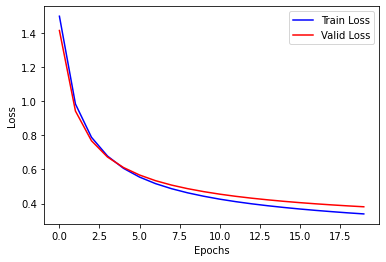

In [31]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)

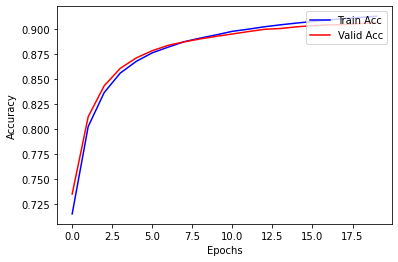

In [32]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)

### 评估模型

### 完成训练后，在测试集上评估模型的准确率

In [33]:
acc_test = accuracy(test_x,test_y,W,B).numpy()
print("Test accuracy:{:.4f}".format(acc_test))

Test accuracy:0.9066


# 模型应用与可视化

### 在建立模型并进行训练后，若认为准确率可以接受，则可以使用此模型进行预测

In [34]:
# 定义预测函数
def predict(x,w,b):
    pred = model(x,w,b)
    result = tf.argmax(pred,1).numpy()
    return result

In [35]:
pred_test = predict(test_x,W,B)

In [36]:
pred_test[0]

7

### 定义可视化函数 

In [37]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,preds,index=0,num=10):
    fig=plt.gcf() # 获取当前图表
    fig.set_size_inches(10,4)
    if num>10:
        num = 10          # 最多显示10个子图
    for i in range(0,num):
        ax = plt.subplot(2,5,i+1)  # 获取当前要处理的子图
        
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary')# 显示第index个图形
        
        title = 'label=' + str(labels[index])
        if len(preds)>0:
            title += ",predict=" + str(preds[index])
                              
        ax.set_title(title,fontsize=10)  # 显示图上的title信息
        ax.set_xticks([])   #不显示坐标轴
        ax.set_yticks([])
        index = index+1
    plt.show()

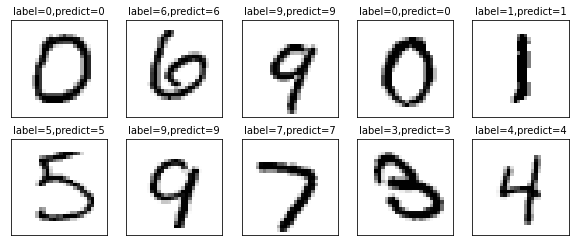

In [38]:
plot_images_labels_prediction(test_images,test_labels,pred_test,10,10)